# Python Data Wrangling with `pandas`

* * * 
<div class="alert alert-success">  
    
### Learning Objectives 
    
* Gain familiarity with `pandas` and the core `DataFrame` object
* Apply core data wrangling techniques in `pandas`
* Understand the flexibility of the `pandas` library
</div>

### Icons Used in This Notebook
🔔 **Question**: A quick question to help you understand what's going on.<br>
🥊 **Challenge**: Interactive exercise. We'll work through these in the workshop!<br>
💡 **Tip**: How to do something a bit more efficiently or effectively.<br>
⚠️ **Warning:** Heads-up about tricky stuff or common mistakes.<br>
🎬 **Demo**: Showing off something more advanced – so you know what Pandas can be used for!<br>

In this workshop, we provide an introduction to **data wrangling with Python**. We will do so largely with the `pandas` package, which provides a rich set of tools to manipulate and interact with data frames, the most common data structure used when analyzing tabular data.

We'll use worked examples and practice on real data to learn the core techniques of data wrangling -- how to index, manipulate, merge, group, and plot data frames -- in `pandas`. 


💡 **Tip**: Why's it called `pandas`? The `pandas` website states:

>The `pandas` name itself is derived from *panel data*, an econometrics term for multidimensional structured data sets, and *Python data analysis* itself. After getting introduced, you can consult the full [`pandas` documentation](http://pandas.pydata.org/pandas-docs/stable/).

Now let's get started!

<mark>just do 6-8 challenges tops</mark>

### Sections
#### Part 1
1. [The `DataFrame` object](#dataframe)
2. [Indexing data](#indexing)
3. [Manipulating data](#manipulating)

#### Part 2
4. [Merging](#variables)
5. [Grouping](#grouping)
5. [Data products](#demo)

<a id='dataframe'></a>
# The `DataFrame` object

`pandas` is designed to make it easier to work with structured, tabular data. Most of the analyses you perform will likely involve using tabular data, e.g., from .csv files or relational databases (e.g., SQL). The `DataFrame` object in `pandas` is "a two-dimensional tabular, column-oriented data structure with both row and column labels." We'll see exactly what this looks like in a moment.
## Importing and Viewing Data
To start, we'll work with European unemployment data from Eurostat, which is hosted by [Google](https://code.google.com/p/dspl/downloads/list). There are several `.csv` files that we'll work with in this workshop.

Let's begin by importing `pandas` using the conventional `pd` abbreviation.

In [1]:
# Imports pandas and assign it to the variable `pd`
import pandas as pd

# We often import NumPy (numerical python) with pandas
# we will import that and assign it to the variable `np`
import numpy as np

# Load matplotlib for plotting later in the notebook
import matplotlib.pyplot as plt
%matplotlib inline

The `read_csv()` function in `pandas` allows us to easily import our data. By default, it assumes the data is comma-delimited. However, you can specify the delimiter used in your data (e.g., tab, semicolon, pipe, etc.) via the `sep=` argument. There are many other parameters that you can specify as you read in data (see the [documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)). Ultimately, the `read_csv()` function returns a `DataFrame` object, which is the main object `pandas` uses to represent tabular data.

Notice that we call `read_csv()` using the `pd` abbreviation from the import statement above:

In [2]:
unemployment = pd.read_csv('../data/country_total.csv')

Let's run `type()` on the `unemployment` object and see what it is...

In [3]:
type(unemployment)

pandas.core.frame.DataFrame

Great! You've created a `pandas` `DataFrame`. We can look at our data by using the `.head()` method. By default, this shows the header (column names) and the first **five** rows.  

In [4]:
unemployment.head()

,country,seasonality,month,unemployment,unemployment_rate
0,at,nsa,1993.01,171000,4.5
1,at,nsa,1993.02,175000,4.6
2,at,nsa,1993.03,166000,4.4
3,at,nsa,1993.04,157000,4.1
4,at,nsa,1993.05,147000,3.9


💡 **Tip**: If you'd like to see some other number of rows, you can pass an integer to `.head()` to return that many rows. For example `unemployment.head(6)` would return the first six rows.  



To find the number of rows, you can use the `len()` function form "base" python. Alternatively, you can use the `shape` attribute, which returns a [tuple](https://www.w3schools.com/python/python_tuples.asp): `(number of rows, number of columns)`

In [5]:
unemployment.shape

(20796, 5)

<mark> note why these have all been in their own cell </mark>  
There are 20,796 rows and 5 columns.

A useful method that generates various summary statistics is `.describe()`.

In [6]:
unemployment.describe()

,month,unemployment,unemployment_rate
count,20796.000000,2.079600e+04,19851.000000
mean,1999.401290,7.900818e+05,8.179764
std,7.483751,1.015280e+06,3.922533
min,1983.010000,2.000000e+03,1.100000
25%,1994.090000,1.400000e+05,5.200000
50%,2001.010000,3.100000e+05,7.600000
75%,2006.010000,1.262250e+06,10.000000
max,2010.120000,4.773000e+06,20.900000


<mark>Note that `.describe()` returns the following</mark>

You may have noticed that the "count" is lower for the unemployment rate. This is because the summary statistics are based on *non-missing* values. So, this dataset has some missing values for the unemployment rate. We will dig deeper into dealing with missing values soon.

⚠️ **Warning**: `.describe()` will behave differently depending on your data's types, or, `dtype`s. If your `DataFrame` includes both numeric and object (e.g., strings) `dtype`s, it will default to **summarizing only the numeric data** (as shown above). If `.describe()` is called on a `DataFrame` that only contains strings, it will return the count, number of unique values, and the most frequent value along with its count.  

We can quickly find out what `dtype`s each of our columns contain with the `.dtypes` attribute.

In [7]:
unemployment.dtypes

country               object
seasonality           object
month                float64
unemployment           int64
unemployment_rate    float64
dtype: object

In [8]:
unemployment.columns

Index(['country', 'seasonality', 'month', 'unemployment', 'unemployment_rate'], dtype='object')

---

## 🥊 Challenge 1: Import Data From A URL

Above, we imported the unemployment data using the `read_csv` function and a relative file path. `read_csv` is [a very flexible method](https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.read_csv.html); it also allows us to import data using a URL as the file path. 

A csv file with data on world countries and their abbreviations is located at the URL:

[https://raw.githubusercontent.com/dlab-berkeley/introduction-to-pandas/master/data/countries.csv](https://raw.githubusercontent.com/dlab-berkeley/introduction-to-pandas/master/data/countries.csv)

We've saved this exact URL as a string variable, `countries_url`, below.

Using `read_csv`, import the country data and save it to the variable `countries`.

---

In [9]:
countries_url = 'https://raw.githubusercontent.com/dlab-berkeley/Python-Data-Wrangling/main/data/countries.csv'
# countries = # YOUR CODE HERE
### Answer
countries = pd.read_csv(countries_url)

---

## 🥊 Challenge 2: The `tail` method

DataFrames all have a method called `.tail()`, which behaves very similarly to `.head()`...

<span style="color:purple">🔔 **Question:** Before using `.tail()`, can you guess at what it does?</span>  

Try using `.tail()` on your `countries` dataframe; was your guess correct?

---

In [10]:
# YOUR CODE HERE
### Answer
countries.tail()

,country,google_country_code,country_group,name_en,name_fr,name_de,latitude,longitude
25,si,SI,eu,Slovenia,Slovénie,Slowenien,46.149259,14.986617
26,es,ES,eu,Spain,Espagne,Spanien,39.895013,-2.988296
27,se,SE,eu,Sweden,Suède,Schweden,62.198467,14.896307
28,tr,TR,non-eu,Turkey,Turquie,Türkei,38.952942,35.439795
29,uk,GB,eu,United Kingdom,Royaume-Uni,Vereinigtes Königreich,54.315447,-2.232612


---

## 🥊 Challenge 3: Exploring `countries`

It's important to understand a few fundamentals about your data before you start work with it, including what information it contains, how large it is, and how the values are generally distributed.

Using the methods and attributes above, **answer the following questions** about `countries`:

1. What columns does it contain?
2. How many rows and columns does it contain?
3. What are the minimum and maximum values of each column?

Hint: consider using `head`, `describe`, and `shape` here.

<mark> make this into a poll </mark>

---

In [11]:
# Answer
countries.head()

,country,google_country_code,country_group,name_en,name_fr,name_de,latitude,longitude
0,at,AT,eu,Austria,Autriche,Österreich,47.696554,13.345980
1,be,BE,eu,Belgium,Belgique,Belgien,50.501045,4.476674
2,bg,BG,eu,Bulgaria,Bulgarie,Bulgarien,42.725674,25.482322
3,hr,HR,non-eu,Croatia,Croatie,Kroatien,44.746643,15.340844
4,cy,CY,eu,Cyprus,Chypre,Zypern,35.129141,33.428682


In [12]:
# Answer
countries.shape

(30, 8)

In [13]:
# Answer
countries.describe()

,latitude,longitude
count,30.000000,30.000000
mean,49.092609,14.324579
std,7.956624,11.257010
min,35.129141,-8.239122
25%,43.230916,6.979186
50%,49.238087,14.941462
75%,54.090400,23.351690
max,64.950159,35.439795


## Indexing Data

<mark>TODO: add diagram and explanation of indexing. Add a sentence that explains that the order is always rows, columns</mark>

Wrangling data in a DataFrame often requires extracting specific rows and/or columns of interest. This is referred to as **Indexing**.

We've actually already learned a simple way to index our data using `.head()`, which isolated the first five rows of our data. Now, we will learn more flexible and powerful methods for indexing.

There are numerous ways to index a DataFrame in pandas. This flexibility can be incredibly helpful, but can also create confusion for new users!  

<mark>make the pandas documentation into a tip - give a brief overview of the documentation [the pandas documentation](https://pandas.pydata.org/docs/user_guide/indexing.html))</mark>

### Recall - Indexing in python

In [47]:
my_list = [1, 2, 3, 4, 5, 6]

In [48]:
my_list[:4]

[1, 2, 3, 4]

### `.loc`
First, we'll cover `.loc`.  

`.loc` allows us to index data based on the **labels** of our DataFrame's index and its column names. Let's take a look at its behavior below:

In [15]:
countries.loc[:4, :]

,country,google_country_code,country_group,name_en,name_fr,name_de,latitude,longitude
0,at,AT,eu,Austria,Autriche,Österreich,47.696554,13.345980
1,be,BE,eu,Belgium,Belgique,Belgien,50.501045,4.476674
2,bg,BG,eu,Bulgaria,Bulgarie,Bulgarien,42.725674,25.482322
3,hr,HR,non-eu,Croatia,Croatie,Kroatien,44.746643,15.340844
4,cy,CY,eu,Cyprus,Chypre,Zypern,35.129141,33.428682


The code, `countries.loc[:4, :]` in effect says the following:  
- `countries.loc[`<mark style="background: yellow">**:4**</mark>`, :]` <span>&#8594;</span> Select rows up to index 4
- `countries.loc[:4, `<mark style="background: yellow">**:**</mark>`]` <span>&#8594;</span>
 Select all columns

This format allows us to flexibly select ranges of rows and columns at the same time. Consider this more complex example:

In [16]:
countries.loc[2:4, 'name_en']

2    Bulgaria
3     Croatia
4      Cyprus
Name: name_en, dtype: object

This code executes the following:  
- `countries.loc[`<mark style="background: yellow">**2:4**</mark>`, 'name_en']` -> Select rows from index 2 up to index 4 
- `countries.loc[2:4, `<mark style="background: yellow">**'name_en'**</mark>`]` -> Select the `name_en` column

Let's look at one more example of `.loc`.  
<span>🔔 **Question:** Before running the following code block, can you anticipate what it will output?</span> 

In [17]:
countries.loc[19:29, ['name_en', 'country_group']]

,name_en,country_group
19,Netherlands,eu
20,Norway,non-eu
21,Poland,eu
22,Portugal,eu
23,Romania,eu
24,Slovakia,eu
25,Slovenia,eu
26,Spain,eu
27,Sweden,eu
28,Turkey,non-eu


---

## 🥊 Challenge 4: Indexing with `.loc`

Let's get a little practice with the `.loc` operator.
1. Create 3 code blocks below
2. Index as follows:
  - **Block 1**: select the `google_country_code` for rows indexed 10 through 20
  - **Block 2**: select the `name_en`, `longitude`, and `latitude` for the follwing rows [1, 4, 2, 9]
  - **Block 3**: select the first five rows, then compute their average `latitude` (hint, this can be done usign `.loc` and `.mean()`, all in one line of code)

In [18]:
# answer
countries.loc[10:20, 'google_country_code']

10    DE
11    GR
12    HU
13    IE
14    IT
15    LV
16    LT
17    LU
18    MT
19    NL
20    NO
Name: google_country_code, dtype: object

In [19]:
# answer
countries.loc[[1, 4, 2, 9], ['name_en', 'longitude', 'latitude']]

,name_en,longitude,latitude
1,Belgium,4.476674,50.501045
4,Cyprus,33.428682,35.129141
2,Bulgaria,25.482322,42.725674
9,France,1.718561,46.710994


In [20]:
# answer
countries.loc[:4, 'latitude'].mean()

44.159811444

### `iloc`

`.loc` is a very powerful indexing system and it can handle most indexing tasks you can imagine. However, there are some alternatives that you may find helpful in certain situations. One of which is `.iloc`.  

Whereas `.loc` ultimately selects data based on the index and the column names, `.iloc` selects data based purely on number. For any given DataFrame, we can use `iloc` to select based on row numbers 0 through the number of rows and column numbers 0 through the number of columns:

In [21]:
countries.iloc[:5, :6]

,country,google_country_code,country_group,name_en,name_fr,name_de
0,at,AT,eu,Austria,Autriche,Österreich
1,be,BE,eu,Belgium,Belgique,Belgien
2,bg,BG,eu,Bulgaria,Bulgarie,Bulgarien
3,hr,HR,non-eu,Croatia,Croatie,Kroatien
4,cy,CY,eu,Cyprus,Chypre,Zypern


⚠️ **Warning**: `.loc[:5, :]` and `.iloc[:5, :]` return different selections of data. `.loc` makes an **inclusive** selection, in this case selecting up to and including index 5. This is contrary to typical python subsetting behavior. `.iloc` uses Python's typical subsetting behavior, which means it **always excludes the end position**. Therefore, we don't see the row associated with the index 5. [You can read more here](https://pandas.pydata.org/docs/user_guide/indexing.html#different-choices-for-indexing).

### Positional Indexing
Last but not least, we have positional indexing. Compared to `.loc` and `.iloc`, positional indexing is probably the least flexible in that it only takes in one argument -- either a slice of row numbers, a list of column names, or a single column name.

<mark> add note on the fact that its heavily used for column selection </mark>

In [22]:
countries[1:4]

,country,google_country_code,country_group,name_en,name_fr,name_de,latitude,longitude
1,be,BE,eu,Belgium,Belgique,Belgien,50.501045,4.476674
2,bg,BG,eu,Bulgaria,Bulgarie,Bulgarien,42.725674,25.482322
3,hr,HR,non-eu,Croatia,Croatie,Kroatien,44.746643,15.340844


<mark> reintroduce that we can pass in a list here </mark>

In [23]:
countries[['country', 'country_group']]

,country,country_group
0,at,eu
1,be,eu
2,bg,eu
3,hr,non-eu
4,cy,eu
5,cz,eu
6,dk,eu
7,ee,eu
8,fi,eu
9,fr,eu


In [24]:
countries['country']

0     at
1     be
2     bg
3     hr
4     cy
5     cz
6     dk
7     ee
8     fi
9     fr
10    de
11    gr
12    hu
13    ie
14    it
15    lv
16    lt
17    lu
18    mt
19    nl
20    no
21    pl
22    pt
23    ro
24    sk
25    si
26    es
27    se
28    tr
29    uk
Name: country, dtype: object

Indexing is important. You'll use it a lot. Below, we'll show how to index based on data values.

---

## 🥊 Challenge 6: Indexing Multiple Rows and Columns

Both `loc` and `iloc` can be used to select subsets of columns *and* rows at the same time if they are given lists (and/or slices, for `iloc`] as their two arguments. 

Using `iloc` on the `unemployment` DataFrame, get:
* every row starting at row 4 and ending at row 7
* the 0th, 2nd, and 3rd columns

Repeat that same indexing task using `.loc`

---

In [25]:
# YOUR CODE HERE

# TODO- Boolean indexing

# Manipulating Data
## Renaming Columns

In the unemployment dataset, you may have noticed that the `month` column also includes the year:

In [26]:
unemployment.head()

,country,seasonality,month,unemployment,unemployment_rate
0,at,nsa,1993.01,171000,4.5
1,at,nsa,1993.02,175000,4.6
2,at,nsa,1993.03,166000,4.4
3,at,nsa,1993.04,157000,4.1
4,at,nsa,1993.05,147000,3.9


Let's go ahead and rename it to something more descriptive - `year_month`. The [`.rename()` method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html) allows you to modify index labels and/or column names.  

In [27]:
unemployment.rename(columns={'month' : 'year_month'}).head()

,country,seasonality,year_month,unemployment,unemployment_rate
0,at,nsa,1993.01,171000,4.5
1,at,nsa,1993.02,175000,4.6
2,at,nsa,1993.03,166000,4.4
3,at,nsa,1993.04,157000,4.1
4,at,nsa,1993.05,147000,3.9


💡 **Tip**: You'll notice in the code above that we combined multiple methods together, one after another. This is referred to as [method chaining](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf) (see bottom left hand corner of link). The methods execute sequentially, left-to-right.



As you can see, we passed a `dict` to the `columns` parameter, with the original name as the key and the new name as the value.  Note that `.rename()`, like many other `pandas` methods, returns a copy of the full dataframe. This copy is not saved anywhere unless you explicitly assign it to a variable.

In [28]:
# Note that the column name is unchanged
unemployment.columns

Index(['country', 'seasonality', 'month', 'unemployment', 'unemployment_rate'], dtype='object')

In [29]:
unemployment = unemployment.rename(columns={'month' : 'year_month'})

In [30]:
# Note that the column name has now changed
unemployment.columns

Index(['country', 'seasonality', 'year_month', 'unemployment',
       'unemployment_rate'],
      dtype='object')

It might also make sense to separate the data in `year_month` into two separate columns. To do this, we'll need to access a single column. There are two ways to do this: we can either use bracket (`[]`) or dot notation (referred to as *attribute access*).

In [31]:
# Bracket notation
unemployment['year_month'].head()

0    1993.01
1    1993.02
2    1993.03
3    1993.04
4    1993.05
Name: year_month, dtype: float64


⚠️ **Warning**: It is also possible to access a column via dot notation (also referred to as attribute access) as follows: `unemployment.year_month`. You should avoid this technique, as a column name might inadvertently have the same name as a `DataFrame` (or `Series`) method/attribute. In addition, only bracket notation can be used to create a new column. If you try and use attribute access to create a new column, you'll create a new attribute, *not* a new column.

## Sorting Values

At this point, you might be curious to know what the highest unemployment rates are in this data. For this, we'll use the `sort_values()` method to sort the data.

In [32]:
unemployment.sort_values('unemployment_rate', ascending=False).head()

,country,seasonality,year_month,unemployment,unemployment_rate
15526,pl,nsa,2004.02,3531000,20.9
15525,pl,nsa,2004.01,3520000,20.7
15514,pl,nsa,2003.02,3460000,20.7
5663,es,sa,2010.09,4773000,20.6
15527,pl,nsa,2004.03,3475000,20.6


The above code creates a copy of the `DataFrame`, sorted in *descending* order, and prints the first five rows.

You may have noticed that the data set includes a `seasonality` column, which we haven't yet discussed. The unemployment rate in this data is actually calculated in three separate ways. Let's look at the values.

In [33]:
unemployment['seasonality'].unique()

array(['nsa', 'sa', 'trend'], dtype=object)

The three options above correspond to:

* nsa: not seasonally adjusted
* sa: seasonally adjusted
* trend: trend cycle

We'll stick with seasonally adjusted data so that the values are more comparable. To do this, we'll create a Boolean index. Then, we'll sort the values by unemployment. We'll set `ascending=False` so that it's in descending order, and we see the highest unemployment rates on top:

In [34]:
seasonally_adjusted = unemployment['seasonality'] == 'sa'
seasonally_adjusted.head()

0    False
1    False
2    False
3    False
4    False
Name: seasonality, dtype: bool

In [35]:
unemployment[seasonally_adjusted].sort_values('unemployment_rate', ascending=False)[:5]

,country,seasonality,year_month,unemployment,unemployment_rate
5664,es,sa,2010.10,4758000,20.6
5663,es,sa,2010.09,4773000,20.6
5662,es,sa,2010.08,4739000,20.5
5665,es,sa,2010.11,4723000,20.4
15702,pl,sa,2002.10,3471000,20.3


Spain in January, 2010, has the highest seasonally adjusted unemployment rate. ([See here](https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Glossary:Country_codes) for translating country codes to names)


## Creating new columns + using `.str` methods

So, we still want to split `year_month` into two separate columns. Above, we saw that this column is type (technically, `dtype`) `float64`. We'll first extract the year using the `.astype()` method. This allows for type casting&mdash;basically converting from one type to another. We'll then subtract this value from `year_month`&mdash;to get the decimal portion of the value&mdash;and multiply the result by 100 and convert to `int`.

For more information on `pandas` `dtype`s, check the documentation [here](http://pandas.pydata.org/pandas-docs/stable/basics.html#dtypes).

In [36]:
unemployment['year_month'] = unemployment['year_month'].astype(str)
unemployment['year_month'].head()

0    1993.01
1    1993.02
2    1993.03
3    1993.04
4    1993.05
Name: year_month, dtype: object

In [37]:
unemployment['year_month'].str

In [38]:
unemployment['year_month'].str.split(".")

0        [1993, 01]
1        [1993, 02]
2        [1993, 03]
3        [1993, 04]
4        [1993, 05]
            ...    
20791    [2010, 06]
20792    [2010, 07]
20793    [2010, 08]
20794    [2010, 09]
20795     [2010, 1]
Name: year_month, Length: 20796, dtype: object

In [39]:
unemployment['year'] = unemployment['year_month'].str.split(".").str[0]
unemployment['month'] = unemployment['year_month'].str.split(".").str[1]

In [40]:
unemployment['month'].head(10)

0    01
1    02
2    03
3    04
4    05
5    06
6    07
7    08
8    09
9     1
Name: month, dtype: object

In [41]:
unemployment['month'] = unemployment['month'].str.strip('0')

In [42]:
# unemployment['year'] = unemployment['year_month'].astype(int)

In this case, we're casting the floating point values to integers. In Python, this [truncates the decimals](https://docs.python.org/2/library/stdtypes.html#numeric-types-int-float-long-complex).

Finally, let's create our **month** variable as described above. (Because of the truncating that occurs when casting to `int`, we first round the values to the nearest whole number.)

In [43]:
unemployment.head(10)

,country,seasonality,year_month,unemployment,unemployment_rate,year,month
0,at,nsa,1993.01,171000,4.5,1993,1
1,at,nsa,1993.02,175000,4.6,1993,2
2,at,nsa,1993.03,166000,4.4,1993,3
3,at,nsa,1993.04,157000,4.1,1993,4
4,at,nsa,1993.05,147000,3.9,1993,5
5,at,nsa,1993.06,134000,3.5,1993,6
6,at,nsa,1993.07,128000,3.4,1993,7
7,at,nsa,1993.08,130000,3.4,1993,8
8,at,nsa,1993.09,132000,3.5,1993,9
9,at,nsa,1993.1,141000,3.7,1993,1


---

## 🥊 Challenge 7: Another Way to Obtain the Year

If you didn't know that casting floats to ints truncates the decimals in Python, you could have used NumPy's `floor()` function. `np.floor` takes an array or `pd.Series` of floats as its argument, and returns an array or `pd.Series` where every float has been rounded down to the nearest whole number. 

Use `np.floor` to round the values in the `year_month` column down so we can cast them as integer years. Note that the types are still floats, so we'll still need to use `astype` to typecast.

---

In [49]:
# Select the "year_month" column
year_month = # YOUR CODE HERE

# Use np.floor on year_month to get the years as floats
years_by_floor = # YOUR CODE HERE

# Cast years_by_floor to integers using astype(int)
int_years = # YOUR CODE HERE

# Check that this gets the same answers as our first approach
# This should return True
(unemployment['year_month'].astype(int) == int_years).all()

SyntaxError: invalid syntax (3488067949.py, line 2)

The last line of code in the previous cell does an element-wise comparison of the values in the corresponding arrays. The `.all()` method checks whether *all* elements are `True`.

# Merging DataFrames

So far, our `DataFrame` is organized in a reasonable way. But, we know we can do better. We're eventually going to be interested in the unemployment rate for each country. The trouble is, we don't exactly know what the values in `country` refer to. We can fix that by getting country names. These can be found in `countries.csv`. Run the following cell to import the countries data using a URL as the file path.

In [50]:
countries_url = 'https://raw.githubusercontent.com/dlab-berkeley/Python-Data-Wrangling/main/data/countries.csv'
countries = pd.read_csv(countries_url)

In [51]:
countries.tail(3)

,country,google_country_code,country_group,name_en,name_fr,name_de,latitude,longitude
27,se,SE,eu,Sweden,Suède,Schweden,62.198467,14.896307
28,tr,TR,non-eu,Turkey,Turquie,Türkei,38.952942,35.439795
29,uk,GB,eu,United Kingdom,Royaume-Uni,Vereinigtes Königreich,54.315447,-2.232612


This file has lots of useful information. It even has the country names is three different languages.

Because the data we need is stored in two separate files, we'll want to merge the data somehow. Let's determine which column we can use to join this data. `country` looks like a good option. However, we don't need all of the columns in the `countries` `DataFrame`. To select certain columns, we use the name bracket notation we used to reorder the columns.

In [52]:
country_names = countries[['country', 'country_group', 'name_en']]

In [53]:
country_names.head(2)

,country,country_group,name_en
0,at,eu,Austria
1,be,eu,Belgium


`pandas` includes an easy-to-use merge function. Let's use it to merge the two `DataFrame`s on country code.

In [54]:
unemployment = pd.merge(unemployment, country_names, on='country')

Merging is often more complex than this example. If you want to merge on multiple columns, you can pass a list of column names to the `on` parameter.

```
pd.merge(first, second, on=['name', 'id'])
```

For more information on merging, check the [documentation](http://pandas.pydata.org/pandas-docs/stable/merging.html#database-style-dataframe-joining-merging).

`pandas` also provides a `.merge()` method that can act on a `DataFrame`. You can read more about that [here](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html).

---

## 🥊 Challenge 8

You may sometimes need to merge on columns with different names. To do so, use the `left_on` and `right_on` parameters, where the first listed `DataFrame` is the "left" one and the second is the "right." It might look something this:

```
pd.merge(one, two, left_on='city', right_on='city_name')
```

Suppose wanted to merge `unemployment` with a new DataFrame called `country_codes`, where the abbreviation for each country is in the column "c_code":

---

In [55]:
country_codes = country_names.rename({"country": "c_code"}, axis=1).drop("country_group", axis=1)
country_codes.head()

,c_code,name_en
0,at,Austria
1,be,Belgium
2,bg,Bulgaria
3,hr,Croatia
4,cy,Cyprus


Use `merge` to merge `unemployment` and `country_codes` on their country codes. Make sure to specify `left_on=` and `right_on=` in the call to `merge`!

In [56]:
# YOUR CODE HERE

## Calculating Unique and Missing Values

That's better. We now know that the abbreviation "at" corresponds to Austria. We might be curious to check what countries we have data for. The `Series` object includes a `.unique()` method. We'll use this to check the countries. We can select the name either using bracket or dot notation. (While we suggested using brackets above, it *is* sometimes easier to use dot notation. Just be careful.)

In [57]:
unemployment

,country,seasonality,year_month,unemployment,unemployment_rate,year,month,country_group,name_en
0,at,nsa,1993.01,171000,4.5,1993,1,eu,Austria
1,at,nsa,1993.02,175000,4.6,1993,2,eu,Austria
2,at,nsa,1993.03,166000,4.4,1993,3,eu,Austria
3,at,nsa,1993.04,157000,4.1,1993,4,eu,Austria
4,at,nsa,1993.05,147000,3.9,1993,5,eu,Austria
...,...,...,...,...,...,...,...,...,...
20791,uk,trend,2010.06,2429000,7.7,2010,6,eu,United Kingdom
20792,uk,trend,2010.07,2422000,7.7,2010,7,eu,United Kingdom
20793,uk,trend,2010.08,2429000,7.7,2010,8,eu,United Kingdom
20794,uk,trend,2010.09,2447000,7.8,2010,9,eu,United Kingdom


To get a count of the **number of unique countries,** we can either wrap the above code with `len()` to get the number of items in the array, or we can use the  `Series.nunique()` method.

In [58]:
unemployment.name_en.nunique()

30

It might be more interesting to know how many observations we actually have per unique value. `pandas` has a `Series` method called `.value_counts()` that returns the counts for the unique values in the `Series`.

In [59]:
unemployment['name_en'].value_counts()

France                                       1008
Sweden                                       1008
Portugal                                     1008
Netherlands                                  1008
Luxembourg                                   1008
Denmark                                      1008
Belgium                                      1008
Spain                                        1008
Ireland                                      1008
United Kingdom                               1002
Italy                                         924
Finland                                       828
Norway                                        786
Austria                                       648
Hungary                                       576
Slovakia                                      576
Slovenia                                      576
Bulgaria                                      576
Malta                                         576
Poland                                        576


By default, the `Series` is sorted by values. If you'd like it sorted by index&mdash;country name in this case&mdash;append the `.sort_index()` method.

In [60]:
unemployment['name_en'].value_counts().sort_index()

Austria                                       648
Belgium                                      1008
Bulgaria                                      576
Croatia                                       324
Cyprus                                        396
Czech Republic                                468
Denmark                                      1008
Estonia                                       387
Finland                                       828
France                                       1008
Germany (including  former GDR from 1991)     504
Greece                                        450
Hungary                                       576
Ireland                                      1008
Italy                                         924
Latvia                                        459
Lithuania                                     459
Luxembourg                                   1008
Malta                                         576
Netherlands                                  1008


This will be useful for our analysis. The maximum number of observations for a given country for this time period is 1,008 observations. We'll note that certain countries, such as Turkey, have far less data.

How about finding the **date range** for this data set? Let's look at the minimum and maximum years.

In [61]:
unemployment['year'].min(), unemployment['year'].max()

('1983', '2010')

Next, we should pause for a moment and think about what data we really care about. For our purposes, the variable of interest is `unemployment_rate`. The number of observations by country only reflect the number of instances of each country name in the dataset. It is possible, maybe even expected, to have some missing data within those instances. Let's find out **how many unemployment rate values are missing.**

In [62]:
unemployment['unemployment_rate'].isnull().sum()

945

The `.isnull()` method returns a corresponding boolean value for each entry in the unemployment rate `Series`. In Python `True` is equivalent to 1 and `False` is equivalent to 0. Thus, when we add the result (with `.sum()`), we get a count for the *total* number of missing values.

---

## 🥊 Challenge 9: Exploring Unemployment Rates

What are the minimum and maximum unemployment rates in our data set? Which unemployment rates are most and least common?

Hint: look at where we found the minimum and maximum years for a hint to the first question, and use `value_counts` for the second.

---

In [63]:
# YOUR CODE HERE

# Aggregating and Grouping  Data

What if we'd like to know how many missing values exist at the *country* level? To do so, we need to calculate a separate value for each unique value of country. In other words, we're going to **group** our data **by** a specific column, and calculate some quantity within each group. The "group-by" operation is a fundamental technique used with relational dataset.

First, we can take the main part of what we had above and create a new column in the `DataFrame`:

In [64]:
unemployment['unemployment_rate_null'] = unemployment['unemployment_rate'].isnull()

To count the number of missing values by each country, we'll perform the grouping operation with the `.groupby()` method:

In [65]:
unemployment.groupby('name_en')['unemployment_rate_null'].sum()

name_en
Austria                                        0
Belgium                                        0
Bulgaria                                     180
Croatia                                      216
Cyprus                                         0
Czech Republic                                 0
Denmark                                        0
Estonia                                        0
Finland                                        0
France                                         0
Germany (including  former GDR from 1991)      0
Greece                                         0
Hungary                                       36
Ireland                                        0
Italy                                          0
Latvia                                         0
Lithuania                                      0
Luxembourg                                     0
Malta                                        180
Netherlands                                    0
Norway      

Let's explain what just happened. We start with our `DataFrame`. We tell `pandas` that we want to group the data by country name&mdash;that's what goes in the parentheses. The output of the `groupby()` function is a special object in `pandas` called a `GroupBy` object.

The `GroupBy` object doesn't have what we want, because we need to tell the object how we want to **aggregate**. In this case, we're going to aggregate by summing the missing values across each group -- i.e., the aggregation is the `sum()` operation. So, we need to tell it what column we'd like to perform the `.sum()` operation on. In this case, it's the indicator for whether or not the unemployment rate was missing.

As we saw above, the number of records for each country differs. We might, then, want to have the missing values by country shown as proportions. Let's do a separate `groupby()` calculation. This time, we'll use a the `mean()` function as the aggregator, since we want to to calculate proportions for each country:

In [66]:
unemployment.groupby('name_en')['unemployment_rate_null'].mean()

name_en
Austria                                      0.000000
Belgium                                      0.000000
Bulgaria                                     0.312500
Croatia                                      0.666667
Cyprus                                       0.000000
Czech Republic                               0.000000
Denmark                                      0.000000
Estonia                                      0.000000
Finland                                      0.000000
France                                       0.000000
Germany (including  former GDR from 1991)    0.000000
Greece                                       0.000000
Hungary                                      0.062500
Ireland                                      0.000000
Italy                                        0.000000
Latvia                                       0.000000
Lithuania                                    0.000000
Luxembourg                                   0.000000
Malta               

This looks good. Let's save this as its own `DataFrame`. We'll re-run the `groupby()`, but pass in a new argument called `as_index=False`. What does this argument do?

In [67]:
unemployment_rate = unemployment.groupby('name_en', as_index=False)['unemployment_rate_null'].mean()

In [68]:
unemployment_rate.head()

,name_en,unemployment_rate_null
0,Austria,0.000000
1,Belgium,0.000000
2,Bulgaria,0.312500
3,Croatia,0.666667
4,Cyprus,0.000000


`unemployment_rate` is a `DataFrame` with the null proportion for unemployment rates. It's important to note that using `as_index=False` in `.groupby()` only works if the grouping column(s) are not the same as the columns on which we're performing the operation.

Also, to group by several columns, simply pass in a list of column names to `.groupby()`.

```
unemployment.groupby(['name_en', 'seasonality'])['unemployment_rate'].mean()
```

---

## 🥊 Challenge 10: Group By Practice

Find the average unemployment rate for European Union vs. non-European Union countries. 

1. First, use `groupby()` to group on "country_group".
2. Then, select the "unemployment_rate" column,
3. Aggregate by using `.mean()` to get the average.

---

In [69]:
# YOUR CODE HERE

## Exporting A DataFrame to a CSV File

From our analysis on missing unemployment rates, we can observe that Croatia is missing a relatively large amount of data (~66% of records are missing). The `unemployment_rate` data frame contains this information, and is useful to keep for further analysis.

Suppose we wanted to save this as a .csv file. For this, we'd use the `.to_csv()` method:

In [70]:
unemployment_rate.to_csv('../data/unemployment_missing.csv')

Let's import this newly created file, and see what it looks like:

In [71]:
unemployment_missing = pd.read_csv('../data/unemployment_missing.csv')
unemployment_missing.head()

,Unnamed: 0,name_en,unemployment_rate_null
0,0,Austria,0.000000
1,1,Belgium,0.000000
2,2,Bulgaria,0.312500
3,3,Croatia,0.666667
4,4,Cyprus,0.000000


What do you see here? By default, this method writes the indices. We probably don't want that. Let's edit the code. Let's also be explicit about the type of delimiter we're interested in. (Values can be separated by pipes (`|`), semicolons (`;`), tabs (`\t`), etc.)

In [72]:
unemployment_rate.to_csv('../data/unemployment_missing.csv', index=False, sep=',')

In [73]:
unemployment_missing = pd.read_csv('../data/unemployment_missing.csv')
unemployment_missing.head()

,name_en,unemployment_rate_null
0,Austria,0.000000
1,Belgium,0.000000
2,Bulgaria,0.312500
3,Croatia,0.666667
4,Cyprus,0.000000


Much better!

Let's return to our main `DataFrame`. Now that we have the missing values information in `unemployment_rate`, we can **drop the last column** we added to `unemployment`.

In [74]:
unemployment.drop('unemployment_rate_null', axis=1, inplace=True)

It's important to specify the `axis` parameter. Specifically, `axis=1` refers to columns while `axis=0` refers to rows. The parameter `inplace=True` simply modifies the actual `DataFrame` rather than returning a new `DataFrame`.

In [75]:
unemployment.head()

,country,seasonality,year_month,unemployment,unemployment_rate,year,month,country_group,name_en
0,at,nsa,1993.01,171000,4.5,1993,1,eu,Austria
1,at,nsa,1993.02,175000,4.6,1993,2,eu,Austria
2,at,nsa,1993.03,166000,4.4,1993,3,eu,Austria
3,at,nsa,1993.04,157000,4.1,1993,4,eu,Austria
4,at,nsa,1993.05,147000,3.9,1993,5,eu,Austria


## Dealing With Missing Values: Boolean Indexing

Now that we know about the missing values, we have to deal with them. There are two main options:

* Fill the missing values with some other values.
* Do not use observations with missing values.
    * Depending on the analysis, we may want to exclude entire countries.
    
Because countries with missing unemployment rate data have at least 36 missing values, which is too many to fill, we'll take the second approach and **exclude missing values** from our primary analyses.

Instead of just getting rid of that data, it might make sense to store it in a separate `DataFrame`. This way, we could answer questions such as, "do missing values occur during certain months (or years) more frequently?" With this, we will introduce the concept of *boolean indexing* for filtering data.

Recall that we used the `isnull()` function to determine whether a data element is missing. This function returns a `pd.Series` containing Boolean values:

In [76]:
unemployment['unemployment_rate'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
20791    False
20792    False
20793    False
20794    False
20795    False
Name: unemployment_rate, Length: 20796, dtype: bool

To subselect the rows with missing values, we'll use this Boolean `pd.Series` to index the `unemployment` data frame, just like we might row numbers or column names. Specifically, we'll pass the Boolean series into a pair of bracket, which will then return only the rows where the value in the array is `True`. Let's see what this looks like:

In [77]:
unemployment_rate_missing = unemployment[unemployment['unemployment_rate'].isnull()]

In [78]:
unemployment_rate_missing.head()

,country,seasonality,year_month,unemployment,unemployment_rate,year,month,country_group,name_en
1656,bg,nsa,1995.01,391000,NaN,1995,1,eu,Bulgaria
1657,bg,nsa,1995.02,387000,NaN,1995,2,eu,Bulgaria
1658,bg,nsa,1995.03,378000,NaN,1995,3,eu,Bulgaria
1659,bg,nsa,1995.04,365000,NaN,1995,4,eu,Bulgaria
1660,bg,nsa,1995.05,346000,NaN,1995,5,eu,Bulgaria


It is also possible to specify multiple conditions using the `&` operator, but each condition needs to be inside of parentheses. The `.isin()` method, which takes a `list` of values, is useful when you're interested in conditioning on multiple values on a given column. For example, if you want to select multiple countries.

Now, we're ready to remove the missing data in `unemployment`. To do this, we can use the `.dropna()` method.

In [79]:
unemployment.dropna(subset=['unemployment_rate'], inplace=True)

Note that while we have dropped all observations for which `unemployment_rate == NaN`, this doesn't mean that all of our observations overlap exactly in time. We may find that there are dates where we have data for one country and no data for others.

---

### Challenge 11: Boolean Indexing

Suppose we only want to look at unemployment data from the year 2000 or later. Use Boolean indexing to create a DataFrame with only these years.

1. Select the "year" column from `unemployment`.
2. Using the year data, create a **mask**: an array of Booleans where each value is True if and only if the year is 2000 or later. Remember, you can use Boolean operators like `>`, `<`, and `==` on a column.
3. Use the mask from step 2 to index `unemployment`.

---

In [80]:
# Select the year column from unemployment
year = # YOUR CODE HERE

# Create a mask
later_or_equal_2000 = # YOUR CODE HERE

# Boolean index unemployment
# YOUR CODE HERE

SyntaxError: invalid syntax (2703933329.py, line 2)

## Plotting with `pandas`

The best way to get a sense of this data is to plot it. Data visualization is an integral component of conveying your findings to others. While the D-Lab has a [Python Data Visualization](https://github.com/dlab-berkeley/Python-Data-Visualization) workshop, we'll cover some basics in `pandas` here.

Before we begin, let's sort the data by country and date. This is good practice and is especially important when using `pandas`'s `.plot()` method because the x-axis values are based on the indices. When we sort, the index values remain unchanged. Thus, we need to reset them. The `drop` parameter tells `pandas` to construct a `DataFrame` *without* adding a column.

In [81]:
unemployment.sort_values(['name_en', 'year_month'], inplace=True)
unemployment.reset_index(drop=True, inplace=True)

Let's take a look at Spain's unemployment rate (only because it was the highest) across time.

In [82]:
spain = unemployment[(unemployment['name_en'] == 'Spain') &
                     (unemployment['seasonality'] == 'sa')]
spain.head()

,country,seasonality,year_month,unemployment,unemployment_rate,year,month,country_group,name_en
16741,es,sa,1986.04,2518000,17.7,1986,4,eu,Spain
16744,es,sa,1986.05,2502000,17.5,1986,5,eu,Spain
16747,es,sa,1986.06,2481000,17.4,1986,6,eu,Spain
16750,es,sa,1986.07,2485000,17.4,1986,7,eu,Spain
16753,es,sa,1986.08,2476000,17.3,1986,8,eu,Spain


Now, we'll use the `plot()` function to create a line plot of this data:

<AxesSubplot: >

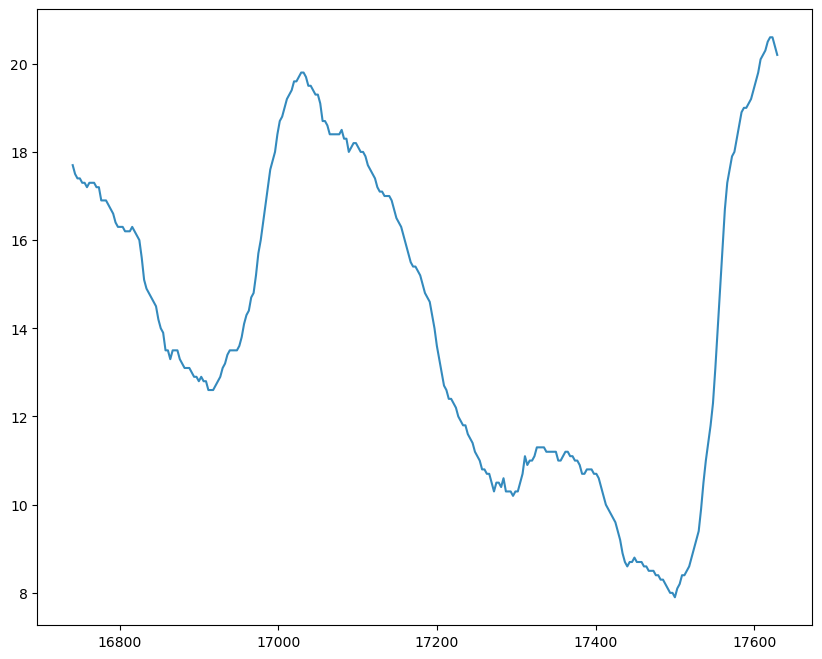

In [83]:
spain['unemployment_rate'].plot(figsize=(10, 8), color='#348ABD')

Note that the values along the x-axis represent the indices associated with Spain in the sorted `unemployment` `DataFrame`. Wouldn't it be nice if, instead, we could show the time period associated with the various unemployment rates for Spain? It might also be interesting to **compare** Spain's unemployment rate with its neighbor to the west, Portugal.

Let's first create a `DataFrame` that contains the unemployment data for both countries.

In [84]:
ps = unemployment[(unemployment['name_en'].isin(['Portugal', 'Spain'])) &
                  (unemployment['seasonality'] == 'sa')]

Next, we'll generate time series data by converting our years and months into `datetime` objects. `pandas` provides a `to_datetime()` function that makes this relatively simple. It converts an argument&mdash;a single value or an array of values&mdash;to `datetime` (note that the return value [depends on the input](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html)). If we were interested in March 23, 1868, for example, we could do the following:

In [85]:
pd.to_datetime('1868/3/23')

Timestamp('1868-03-23 00:00:00')

The argument doesn't necessarily have to be specified in the `yyyy/mm/dd` format. You could list it as `mm/dd/yyyy`, but it's a good idea to be explicit. To do so, we pass in a string into the `format` keyword:

In [86]:
pd.to_datetime('3/23/1868', format='%m/%d/%Y')

Timestamp('1868-03-23 00:00:00')

Let's create the `datetime` object and add it to the `DataFrame` as a column named `date`. First, we create the datetimes using `pd.to_datetime`, and we'll double check that the values look right:

In [87]:
datetimes = pd.to_datetime(ps['year'].astype(str) + '/' + ps['month'].astype(str) + '/1')
datetimes.head()

14302   1983-01-01
14305   1983-02-01
14308   1983-03-01
14311   1983-04-01
14314   1983-05-01
dtype: datetime64[ns]

Next, we'll use the `DataFrame.insert()` method to place these datetimes in a new column:

In [88]:
ps.insert(loc=0, column='date', value=datetimes)

Finally, let's only keep certain columns, rename them, and reshape the `DataFrame`.

In [89]:
ps = ps[['date', 'name_en', 'unemployment_rate']]
ps.columns = ['Time Period', 'Country', 'Unemployment Rate']

In [90]:
ps.head()

,Time Period,Country,Unemployment Rate
14302,1983-01-01,Portugal,7.5
14305,1983-02-01,Portugal,7.6
14308,1983-03-01,Portugal,7.7
14311,1983-04-01,Portugal,7.9
14314,1983-05-01,Portugal,8.0


In order to make the plotting easier, we're going to use a `pivot()` operation to change the structure of the data frame:

In [91]:
ps = ps.pivot_table(index='Time Period', columns='Country', values='Unemployment Rate')

In [92]:
ps.head()

Country,Portugal,Spain
Time Period,,
1983-01-01,7.95,NaN
1983-02-01,7.60,NaN
1983-03-01,7.70,NaN
1983-04-01,7.90,NaN
1983-05-01,8.00,NaN


How did the structure of the data frame change?

Now, let's plot:

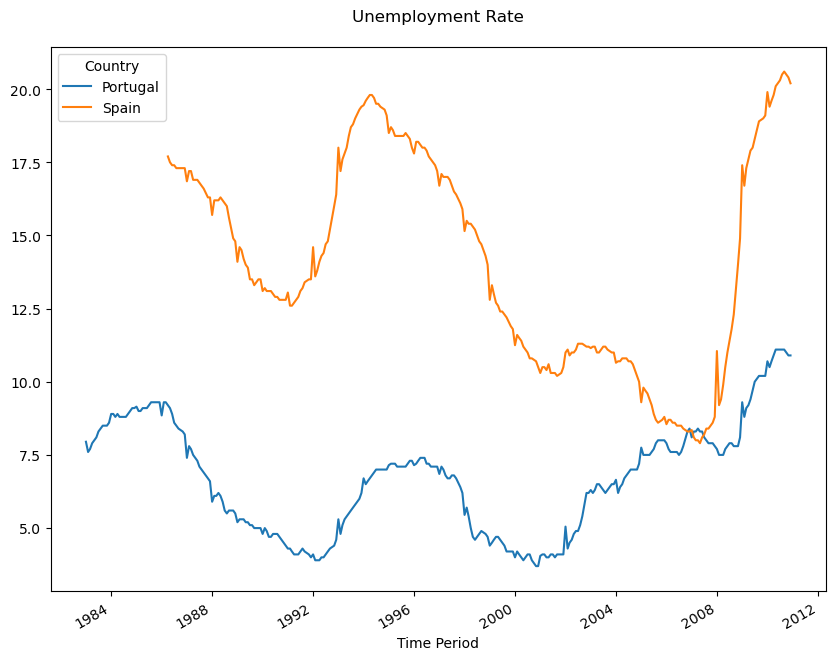

In [93]:
ps.plot(figsize=(10, 8), title='Unemployment Rate\n');

---

### Challenge 12: Plot without Missing Values

Note that there are some dates for which we lack data on Spain's unemployment rate. What could you do if you wanted your plot to show only dates where both Spain and Portugal have a defined unemployment rate?

---

In [94]:
# YOUR CODE HERE